In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('gapminder.tsv', sep='\t')

In [7]:
df
#연도별로 그룹화한 다음 기대수명에 대한 평균
avg_life_exp_by_year=df.groupby('year').lifeExp.mean()
#df.groupby('year')['lifeExp'].mean()

In [8]:
avg_life_exp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [11]:
#연도를 중복을 제외하고 출력
years=df.year.unique()

In [17]:
#df에서 연도가 1952년인 자료를 추출하여 y1952변수에 저장하시오
y1952=df[df.year==1952]
y1952=df.loc[df.year==1952,:]
y1952
y1952_mean=y1952.lifeExp.mean()

In [18]:
y1952_mean

49.05761971830987

In [20]:
y1957=df.loc[df.year==1957,:]
y1957_mean=y1957.lifeExp.mean()

In [21]:
y1957_mean

51.507401126760534

In [22]:
y1952_mean

49.05761971830987

In [23]:
pd.DataFrame({'year':[1952,1957],
             "ymean":[y1952_mean, y1957_mean]})

,year,ymean
0,1952,49.057620
1,1957,51.507401


In [24]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [27]:
df.groupby('year').agg({'lifeExp':'mean', 'pop':'median', 'gdpPercap':'median'})

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334740
1972,57.647386,5877996.5,3339.129407
1977,59.570157,6404036.5,3798.609244
1982,61.533197,7007320.0,4216.228428
1987,63.212613,7774861.5,4280.300366
1992,64.160338,8688686.5,4386.085502


In [28]:
import seaborn as sns

In [30]:
tips_10=sns.load_dataset('tips').sample(10)

In [31]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
113,23.95,2.55,Male,No,Sun,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
88,24.71,5.85,Male,No,Thur,Lunch,2
64,17.59,2.64,Male,No,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
54,25.56,4.34,Male,No,Sun,Dinner,4
153,24.55,2.00,Male,No,Sun,Dinner,4


In [36]:
tips_10.loc[np.random.permutation(tips_10.index)[:4],'total_bill']=np.NaN

In [39]:
tips_10
count_sex=tips_10.groupby('sex').count()

In [52]:
def fill_na_mean(x):
    avg=x.mean()     #각 그룹별 토탈빌 열 값의 평균
    return x.fillna(avg)

In [53]:
tm=tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill']=tm
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
80,NaN,3.00,Male,Yes,Thur,Lunch,2,20.825
215,12.90,1.10,Female,Yes,Sat,Dinner,2,12.900
113,NaN,2.55,Male,No,Sun,Dinner,2,20.825
175,32.90,3.11,Male,Yes,Sun,Dinner,2,32.900
88,NaN,5.85,Male,No,Thur,Lunch,2,20.825
64,17.59,2.64,Male,No,Sat,Dinner,3,17.590
172,7.25,5.15,Male,Yes,Sun,Dinner,2,7.250
125,29.80,4.20,Female,No,Thur,Lunch,6,29.800
54,25.56,4.34,Male,No,Sun,Dinner,4,25.560
153,NaN,2.00,Male,No,Sun,Dinner,4,20.825


In [55]:
tips=sns.load_dataset('tips')

In [58]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [62]:
tips10=sns.load_dataset('tips').sample(10, random_state=123)

In [64]:
grouped=tips10.groupby('sex')

In [65]:
grouped.groups

{'Male': [112, 19, 187, 31, 89, 81, 90, 24], 'Female': [169, 219]}

In [67]:
grouped.get_group('Female')

,total_bill,tip,sex,smoker,day,time,size
169,10.63,2.00,Female,Yes,Sat,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4


In [68]:
grouped.get_group('Male')

,total_bill,tip,sex,smoker,day,time,size
112,38.07,4.00,Male,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
31,18.35,2.50,Male,No,Sat,Dinner,4
89,21.16,3.00,Male,No,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
90,28.97,3.00,Male,Yes,Fri,Dinner,2
24,19.82,3.18,Male,No,Sat,Dinner,2


In [69]:
for i in grouped:
    print(i)
    print("="*50)

('Male',      total_bill   tip   sex smoker   day    time  size
112       38.07  4.00  Male     No   Sun  Dinner     3
19        20.65  3.35  Male     No   Sat  Dinner     3
187       30.46  2.00  Male    Yes   Sun  Dinner     5
31        18.35  2.50  Male     No   Sat  Dinner     4
89        21.16  3.00  Male     No  Thur   Lunch     2
81        16.66  3.40  Male     No  Thur   Lunch     2
90        28.97  3.00  Male    Yes   Fri  Dinner     2
24        19.82  3.18  Male     No   Sat  Dinner     2)
('Female',      total_bill   tip     sex smoker  day    time  size
169       10.63  2.00  Female    Yes  Sat  Dinner     2
219       30.14  3.09  Female    Yes  Sat  Dinner     4)


In [72]:
grouped=tips10.groupby(['smoker', 'time'])

In [73]:
grouped.groups

{('No', 'Dinner'): [112, 19, 31, 24], ('No', 'Lunch'): [89, 81], ('Yes', 'Dinner'): [187, 169, 219, 90]}

In [78]:
grouped.get_group(('No', 'Dinner'))

,total_bill,tip,sex,smoker,day,time,size
112,38.07,4.00,Male,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3
31,18.35,2.50,Male,No,Sat,Dinner,4
24,19.82,3.18,Male,No,Sat,Dinner,2


In [ ]:
#인덱스를 DatetimeIndex 타입으로 생성

In [79]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]

In [82]:
idx=pd.to_datetime(date_str) #문자 -> 날짜 형식의 인덱스 생성

In [83]:
idx #날짜 형식의 인덱스

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [86]:
s=pd.Series(np.random.randn(4), index=idx) 
#날짜 형식의 인덱스를 시리즈 또는 데이터프레임에 적용하면 시계열 데이터 생성
s

2018-01-01    1.240439
2018-01-04    0.716699
2018-01-05   -0.355088
2018-01-06    0.510481
dtype: float64

In [88]:
pd.date_range('2022-4-5', '2022-6-4')
pd.date_range('2022-4-5', periods=30)

DatetimeIndex(['2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04'],
              dtype='datetime64[ns]', freq='D')

In [91]:
pd.date_range('2022-4-5', '2022-6-4', freq='B') #주말 제외 평일
pd.date_range('2022-4-5', '2022-6-4', freq='M') #월
pd.date_range('2022-4-5', '2022-6-4', freq='W') #주 



DatetimeIndex(['2022-04-10', '2022-04-17', '2022-04-24', '2022-05-01',
               '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [93]:
#shift 연산자 : 데이터만 이동(인덱스는 그대로)

In [94]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2022-4-1", periods=4, freq="M"))
ts

2022-04-30    1.764052
2022-05-31    0.400157
2022-06-30    0.978738
2022-07-31    2.240893
Freq: M, dtype: float64

In [95]:
ts.shift(1) #아래로 한칸씩 이동

2022-04-30         NaN
2022-05-31    1.764052
2022-06-30    0.400157
2022-07-31    0.978738
Freq: M, dtype: float64

In [96]:
ts.shift(-1) #위로 한칸씩 이동

2022-04-30    0.400157
2022-05-31    0.978738
2022-06-30    2.240893
2022-07-31         NaN
Freq: M, dtype: float64

In [97]:
ts.shift(1, freq='M') #아래로 한칸씩 이동 (인덱스 이동, 자료로 그대로)

2022-05-31    1.764052
2022-06-30    0.400157
2022-07-31    0.978738
2022-08-31    2.240893
Freq: M, dtype: float64

In [98]:
ts.shift(1, freq='W') #아래로 한칸씩 이동 (인덱스 이동, 자료로 그대로)

2022-05-01    1.764052
2022-06-05    0.400157
2022-07-03    0.978738
2022-08-07    2.240893
dtype: float64

In [99]:
from datetime import datetime

In [101]:
now1=datetime.now()

In [102]:
now2=datetime.today()
now2

datetime.datetime(2022, 4, 5, 10, 27, 48, 856992)

In [104]:
t1=datetime(2025, 1, 5, 12, 15, 30)

In [107]:
t1-now1

datetime.timedelta(days=1006, seconds=6471, microseconds=594785)

In [108]:
ebola = pd.read_csv('country_timeseries.csv')

In [110]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [111]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])

In [112]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [115]:
ebola=pd.read_csv('country_timeseries.csv', parse_dates=['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [118]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})#월/일/년
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   order_day  3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [124]:
pd.to_datetime(test_df1['order_day'], format="%d/%m/%y")
pd.to_datetime(test_df1['order_day'], format="%m/%d/%y")
pd.to_datetime(test_df1['order_day'], format="%y/%m/%d")

0   2001-01-15
1   2002-01-15
2   2003-01-15
Name: order_day, dtype: datetime64[ns]

In [120]:
pd.to_datetime(test_df1['order_day']) #형식:년-월-일

0   2015-01-01
1   2015-02-01
2   2015-03-01
Name: order_day, dtype: datetime64[ns]

In [126]:
n=datetime.now()
n

datetime.datetime(2022, 4, 5, 10, 42, 40, 171676)

In [128]:
nd=n.strftime('%Y-%m-%d')
nd
type(nd)

str

In [129]:
nt=n.strftime('%H-%M-%S')
nt

'10-42-40'

In [130]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])


In [132]:
d1=pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

In [138]:
d1[0].year
d1[0].year+1

2019

In [140]:
d1[0].month
d1[0].day

16

In [142]:
ebola = pd.read_csv('country_timeseries.csv')

In [146]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])

In [149]:
ebola[['Date', 'date_dt']] # .info()


,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31
...,...,...
117,3/27/2014,2014-03-27
118,3/26/2014,2014-03-26
119,3/25/2014,2014-03-25
120,3/24/2014,2014-03-24


In [150]:
ebola['date_dt'][3].year
ebola['date_dt'][3].month
ebola['date_dt'][3].day


2

In [158]:
ebola['date_dt'].dt.year
#datetime 형식의 데이터 전체를 추출할때는 dt로 변환한 다음 year/month/day 적용

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: date_dt, Length: 122, dtype: int64

In [160]:
ebola['year']=ebola['date_dt'].dt.year
ebola['month']=ebola['date_dt'].dt.month
ebola['day']=ebola['date_dt'].dt.day

In [161]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [164]:
ebola #가장 오래된 날짜에 해당되는 5개 데이터 추출
ebola.tail(5)
ebola.iloc[-5:]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,2014-03-27,2014,3,27
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-26,2014,3,26
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-25,2014,3,25
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-24,2014,3,24
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-22,2014,3,22


In [165]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [169]:
#ebola['Date'].min() 적용 불가
ebola['date_dt'].min()

Timestamp('2014-03-22 00:00:00')

In [172]:
ebola['date_dt']-ebola['date_dt'].min()

0     289 days
1     288 days
2     287 days
3     286 days
4     284 days
        ...   
117     5 days
118     4 days
119     3 days
120     2 days
121     0 days
Name: date_dt, Length: 122, dtype: timedelta64[ns]

In [174]:
banks = pd.read_csv('banklist.csv') 
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17
...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
551,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [175]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [176]:
banks = pd.read_csv('banklist.csv', parse_dates=[5,6])  #열이름, 인덱스
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [183]:
banks['closing_quarter'],banks['closing_year']=
(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

In [191]:
banks
#closing_year값으로 연도별 문을 닫은 은행 개수를 파악
cy=banks['closing_year'].value_counts()
cy
#banks.groupby('closing_year')['closing_year'].value_counts()
closing_year=banks.groupby('closing_year').size()

In [194]:
banks
closing_year_q=banks.groupby(['closing_year','closing_quarter']).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

<AxesSubplot:xlabel='closing_year,closing_quarter'>

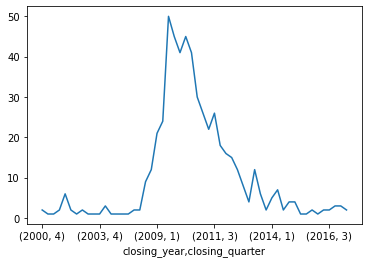

In [195]:
closing_year_q.plot()

In [196]:
#finance.yahoo.com

In [197]:
import pandas_datareader as pdr

In [199]:
#tesla=pdr.get_data_quandl('TSLA', api_key='발급받은 api키')

#www.quandl.com 가입 => api키 발급

In [201]:
ebola['Date']=pd.to_datetime(ebola['Date'])

In [204]:
ebola['Date'].min() #2014-03-22
ebola['Date'].max() #2015-01-05

Timestamp('2015-01-05 00:00:00')

In [205]:
head_range=pd.date_range('2014-12-31', '2015-1-5')

In [206]:
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [209]:
#reindex
ebola5=ebola.head()
ebola5.index=ebola5['Date']
ebola5

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31


In [210]:
ebola5.reindex(head_range)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014.0,12.0,31.0
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015.0,1.0,2.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015.0,1.0,3.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015.0,1.0,4.0
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015.0,1.0,5.0


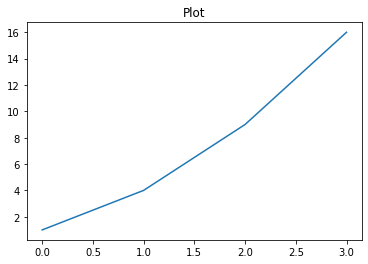

In [211]:
plt.title("Plot")
plt.plot([1, 4, 9, 16]) #list, array

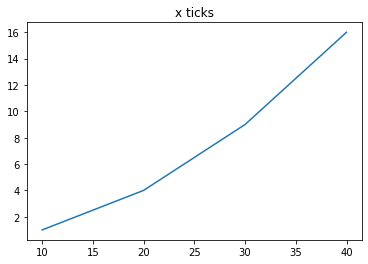

In [212]:
plt.title("x ticks")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])


In [214]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


Text(0, 0.5, '와이축 라벨')

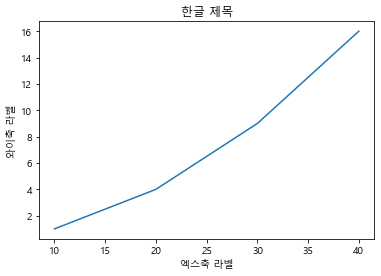

In [215]:
plt.title('한글 제목')
plt.plot([10, 20, 30, 40], [1, 4, 9, 16])
plt.xlabel("엑스축 라벨")
plt.ylabel("와이축 라벨")

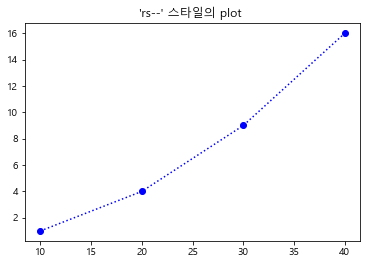

In [224]:
plt.title("'rs--' 스타일의 plot ")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], 'bo:')

Text(0.5, 1.0, '스타일 적용 예')

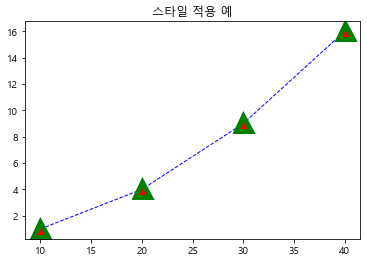

In [232]:
plt.plot([10, 20, 30, 40], [1, 4, 9, 16], c="b",
         lw=1, ls="--", marker="^", ms=15, mec="g", mew=5, mfc="r")
plt.title("스타일 적용 예")

(-10.0, 30.0)

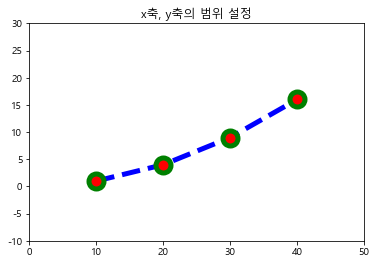

In [233]:
plt.title("x축, y축의 범위 설정")
plt.plot([10, 20, 30, 40], [1, 4, 9, 16],
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")
plt.xlim(0, 50)
plt.ylim(-10, 30)

([<matplotlib.axis.YTick at 0x1bf77341430>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

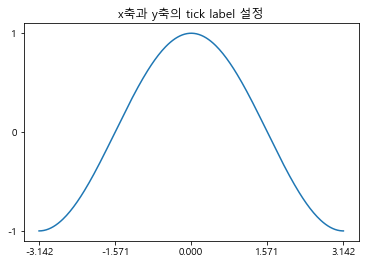

In [236]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title("x축과 y축의 tick label 설정")
plt.plot(X, C)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, +1])

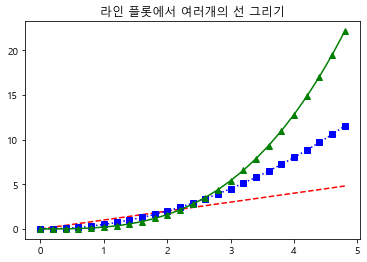

In [237]:
t = np.arange(0., 5., 0.2)
plt.title("라인 플롯에서 여러개의 선 그리기")
plt.plot(t, t, 'r--', t, 0.5 * t**2, 'bs:', t, 0.2 * t**3, 'g^-')


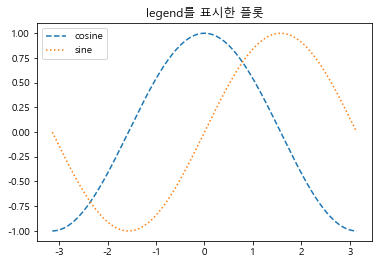

In [244]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.title("legend를 표시한 플롯")
plt.plot(X, C, ls="--", label="cosine")
plt.plot(X, S, ls=":", label="sine")
plt.legend(loc=2)

Text(0.5, 1.0, 'Cosine Plot')

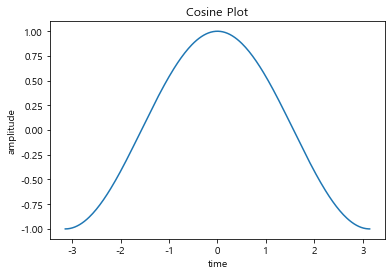

In [245]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label="cosine")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Cosine Plot")

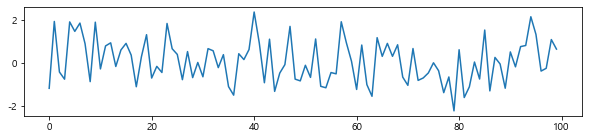

In [249]:
plt.figure(figsize=(10,2)) #1=72pixel
plt.plot(np.random.randn(100))


Text(0, 0.5, 'Undamped')

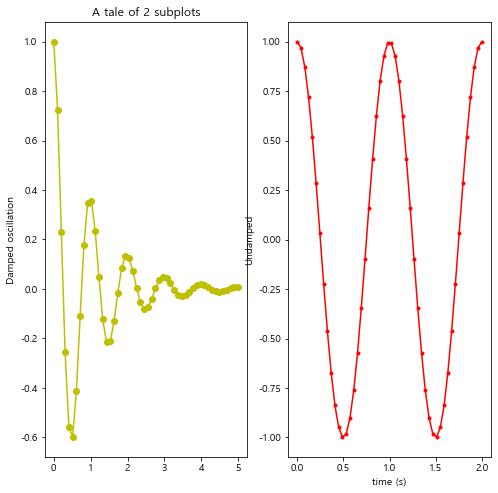

In [252]:
plt.figure(figsize=(8,8)) #1=72pixel

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(1, 2, 1) #(2,1) 2줄 1칸 분리, 1은 출력 위치
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

ax2 = plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

In [254]:
np.arange(len(y))

array([0, 1, 2])

Text(0, 0.5, '빈도 수')

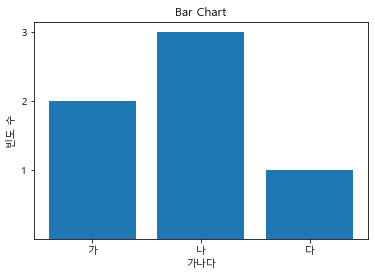

In [253]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")

Text(0.5, 0, 'x 라벨')

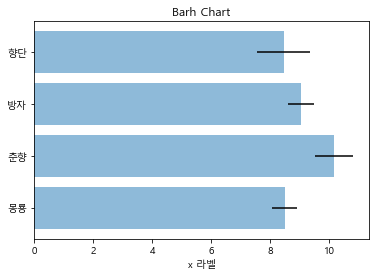

In [260]:
np.random.seed(0)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people)) #0 1 2 3
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.5)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')

<StemContainer object of 3 artists>

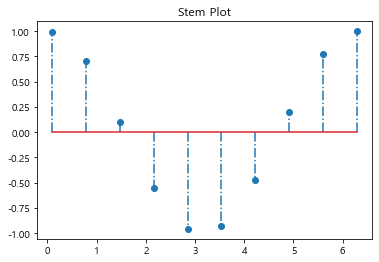

In [261]:
x = np.linspace(0.1, 2 * np.pi, 10)
plt.title("Stem Plot")
plt.stem(x, np.cos(x), '-.')

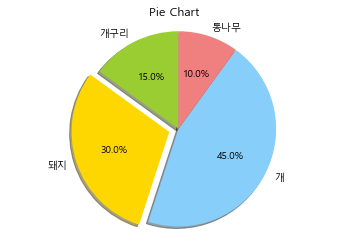

In [269]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

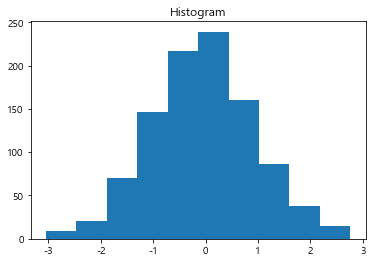

In [272]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)

In [273]:
arrays

array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

In [274]:
bins

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

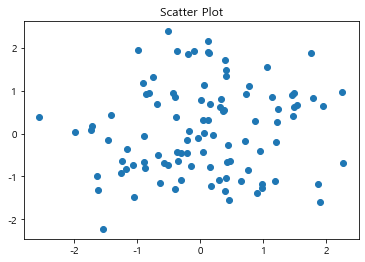

In [275]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)

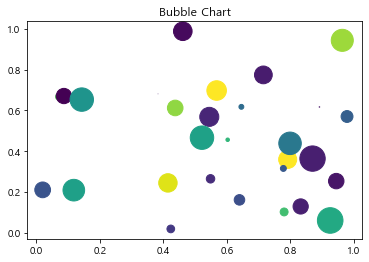

In [276]:
N = 30
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2
plt.title("Bubble Chart")
plt.scatter(x, y1, c=y2, s=y3)

In [277]:
from sklearn.datasets import load_digits
digits = load_digits()

In [280]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [281]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [282]:
digits['data'].shape #(1797, 64) (숫자이미지개수, 숫자이미지데이터)

(1797, 64)

In [289]:
digits['data'][1796].reshape(8,8)

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [290]:
digits['target'][1796]

8

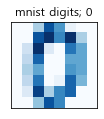

In [296]:
#imshow:수치 데이터 -> 이미지
X = digits.images[0]
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)

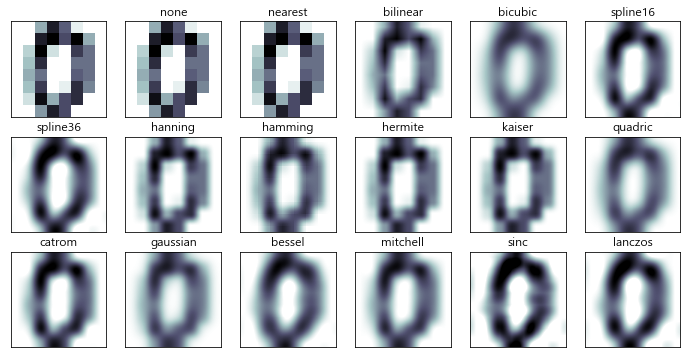

In [297]:
methods = [
    None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
    'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
    'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]
fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(X, cmap=plt.cm.bone_r, interpolation=interp_method)
    ax.set_title(interp_method)

In [298]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터


Text(0.5, 1.0, 'Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ')

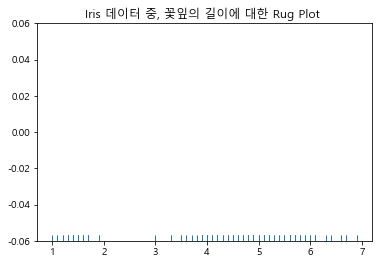

In [299]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")

Text(0.5, 1.0, 'Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot')

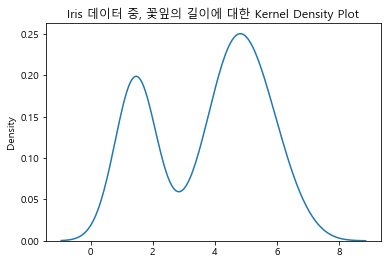

In [300]:
 #밀도 그래프
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")


Text(0.5, 1.0, 'Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot')

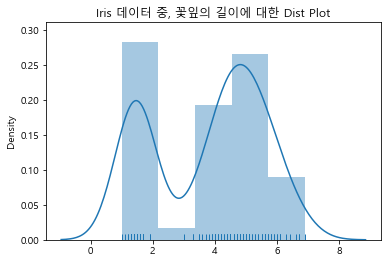

In [301]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")

In [302]:
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터


Text(0.5, 1.0, '타이타닉호의 각 클래스별, 승객 수')

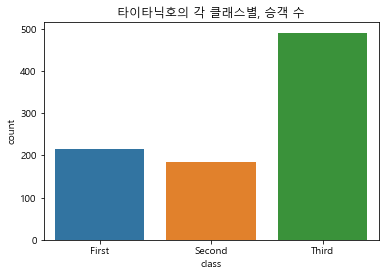

In [303]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")


Text(0.5, 1.02, '꽃받침의 길이와 넓이의 Joint Plot')

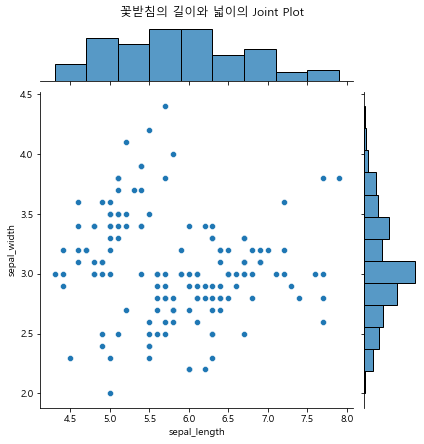

In [304]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)

Text(0.5, 1.02, '꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot')

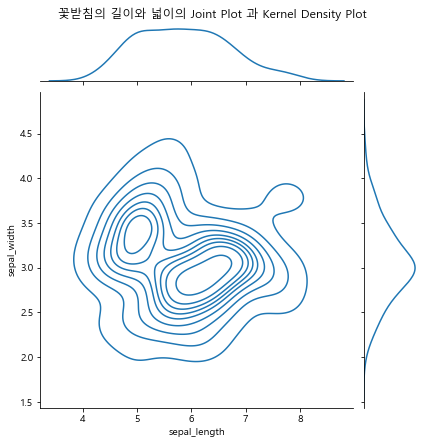

In [305]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)

Text(0.5, 1.0, 'Iris Data의 Pair Plot')

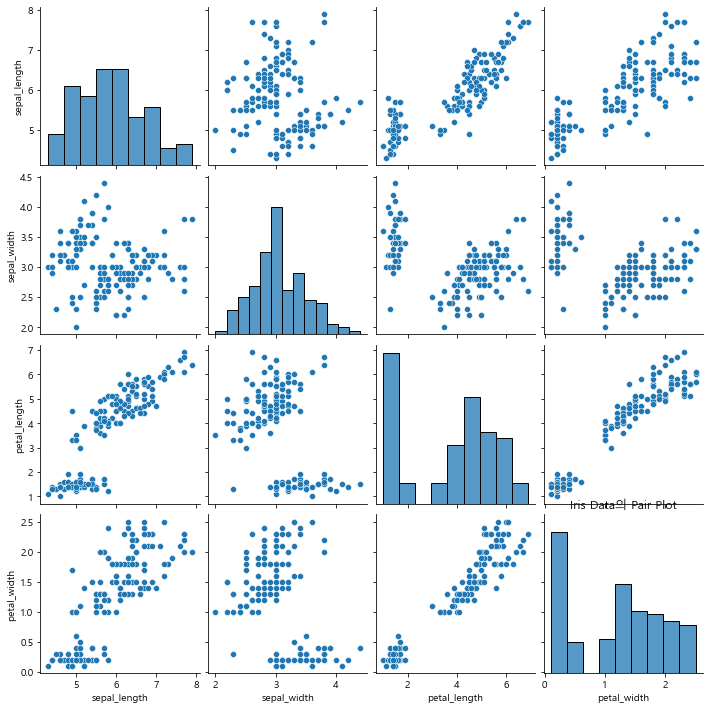

In [306]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")

Text(0.5, 1.0, 'Iris Pair Plot, Hue로 꽃의 종을 시각화')

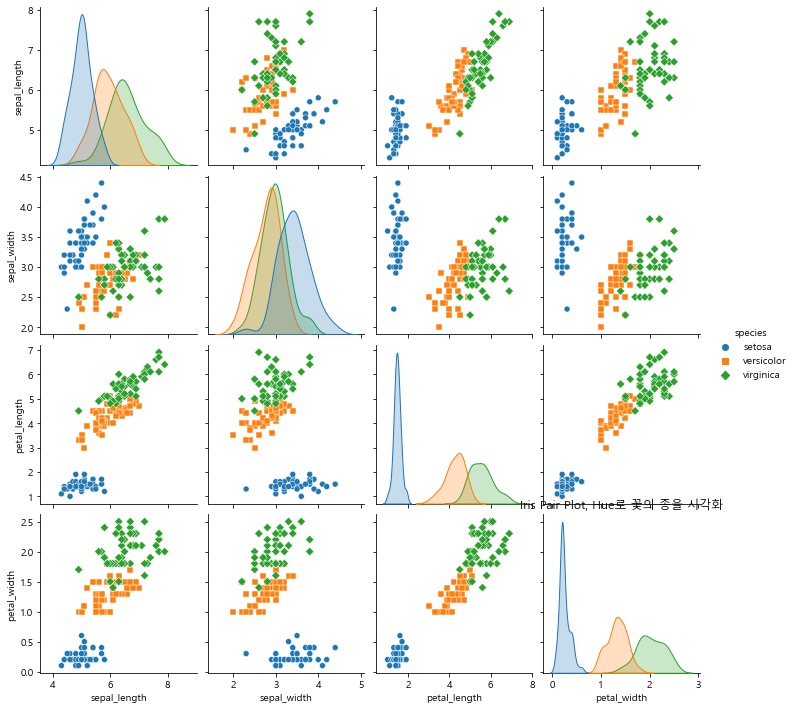

In [307]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")

In [310]:
#2차원, 카테고리형 -> heatmap
titanic
# class별 sex별 자료 건수 요약출력
# 3행 2열
titanic.groupby(['class','sex']).size()
titanic.pivot_table(index='class', columns='sex', aggfunc='size')

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [311]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")

In [312]:
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


Text(0.5, 1.0, 'Heatmap')

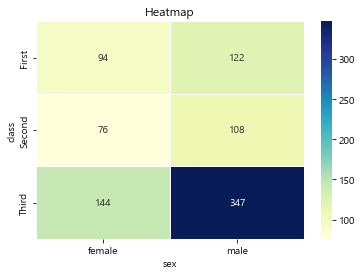

In [318]:
# sns.heatmap(titanic_size, cmap=sns.light_palette(
#     "gray", as_cmap=True), annot=True, fmt="d")
sns.heatmap(titanic_size, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap")